# README Maker
> Complete README in this notebook and then convert this notebook to markdown. Delete every above the horizontal line:

In [33]:
import json
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

import pandas as pd
with open('config/filepaths.json') as f:
    FPATHS = json.load(f)
FPATHS['readme']

{'histogram-reviews-dist_png': 'images/01_histogram_reviews.png',
 'avg-reviews-by-year_png': 'images/02_avg_rating_by_year.png',
 'number-reviews-stars-by-year_png': 'images/03_count_stars_by_year.png',
 'ngrams-by-group_png': 'images/04_ngrams_by_group.png',
 'wordclouds-by-group_png': 'images/05_wordclouds.png'}

In [34]:
import joblib
df = joblib.load(FPATHS['data']['processed-nlp']['processed-reviews-with-target_joblib'])

In [35]:
from IPython.display import Markdown
with open(FPATHS['metadata']['product-information_md']) as f:
    print(f.read())


- Product Title:

***"Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair, 7-Ounce (Pack of 24)"***<p><img src='images/selected-products/miracle-noodle-2024.jpg' width=300px></p>
- Brand: Miracle Noodle
- Price: $59.76
- Ranked 119,683 in Grocery & Gourmet Food (2018)
- Categories:
    - Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki


In [36]:
fpath_model_results = FPATHS['results']['best-ml-clf_joblib']
results_dict = joblib.load(fpath_model_results)
results_dict.keys()

dict_keys(['model', 'train', 'test'])

To Do:
- Change your name and social media links below and remove code block syntax
- Uncomment any sections at the bottom that you wish to add back.

<hr style="color:red;">

# Understanding Consumer Taste Preferences from Reviews

## Natural Language Processing Analysis of Amazon Reviews for Gourmet and Grocery Foods

- James M. Irving, Ph.D.

<blockquote>
    <ul>
  <li><a href="https://www.linkedin.com/in/james-irving-phd" rel="nofollow noreferrer">
    <img src="https://i.stack.imgur.com/gVE0j.png" alt="linkedin"> LinkedIn
  </a> </li>
  <li><a href="https://github.com/jirvingphd" rel="nofollow noreferrer">
    <img src="https://i.stack.imgur.com/tskMh.png" alt="github"> Github
  </a></li>
</ul>
</blockquote>

- Updated 02/12/2024

___

#### Companion Streamlit Dashboard 

- [https://amazon-reviews-nlp-analysis-predictions.streamlit.app/](https://amazon-reviews-nlp-analysis-predictions.streamlit.app/)


<img src="images/streamlit-app-preview.png" width=1000>

___

### Business problem:

Consumer preferences are essential to understand in order to make the best products enjoyed by the most customers. For this reason, we have selected the Grocery and Gourmet Food category, as food products tend to have divergent opinions. 

### Data:

- A subset of the updated Amazon Reviews dataset (Jianmo et al 2019).
    - The large version of the reviews for Groceries & Gourmet Food category, consisting of 5,074,160 reviews.
    - The relevant prodcut metadata for 287,209 Gourmet products

- The raw files are too large to fit in the project repository so they were split into multi-part csv's. 


#### Raw Amazon Data Prep & Filtering

For the metadata,
- First, I filtered the metadata to only keep products that belonged to the `main_cat` of Grocery
- I also one-hot-encoded any category that appeared `...<lookup criterion used>`
- Dropped several unwanted features `<add list>`

For reviews, 
- I kept only reviews that were verified purchases.

In the absence of a true stakehodler, I identified a good brand/prodcut to analyze based on the following crtiera:
- First, I filtered for the most common products with both 1-star and 5-star reviews.
    - Each brand/product was ranked by the number of 1 star reviews and 5-star reviews.
    - The products that appeared within the top 100 most 1-star reviews and 5-star reviews were further analyzed to identify the final product
- Finally, I selected the product with the largest proportion of 1-star reviews.
- The final selected produt was:

>Product Title:
***"Miracle Noodle Zero Carb, Gluten Free Shirataki Pasta, Spinach Angel Hair, 7-Ounce (Pack of 24)"***<p><img src='images/selected-products/miracle-noodle-2024.jpg' width=300px></p>
>- Brand: Miracle Noodle
>- Price: $59.76
>- Ranked 119,683 in Grocery & Gourmet Food (2018)
>- Categories:
    - Grocery & Gourmet Food; Pasta & Noodles; Noodles; Shirataki

###  Need for Insights into Customers

Overall, Miracle Noodle has a large number of 5-star reviews. However, there is also a large portion of 1-star reviews.  
Since this is a multi-year dataset, it is important to understand if there was a trend in the average rating over time.

![png](images/01_histogram_reviews.png)


#### Reviews Over Time

The overall average customer rating has drecreased year-over year.

![png](images/02_avg_rating_by_year.png)



Additionally,  the proportion of One-Star reviews has increased while 5-Star reviews have decreased.
![png](images/03_count_stars_by_year.png)


We will use the text from the customer reviews to provide insights into customer preferences and provide recommendations on how to improve their product.

#### Reference

**Justifying recommendations using distantly-labeled reviews and fined-grained aspects**
Jianmo Ni, Jiacheng Li, Julian McAuley
*Empirical Methods in Natural Language Processing (EMNLP)*, 2019


## Methods `[TO DO]`
- For analysis and machine learning, we used a subset of the reviews.


 
- EDA for Insights:
    - Used spacy for preprocessing text for EDA
    - Generated bar graphs of top bigrams, trigrams, and quadrams for
- key relevant findings from exploritory data analysis for mod 1, will be more involved in future mod

### Streamlit App Methods
- Leveraged Hugging Face pre-trained BART transformers to summarize the 1,000+ reviews for each of the two groups.
- Summaries from the transformer were then used as the context for ChatGPT for providing a final summary and recommendations.


## Results

#### WordClouds (Bigrams)
<img src='images/05_wordclouds.png' width=90%>

> Preliminary review of the word clouds provides some hints as to what may underly the 1-star reviews, however it is diffcult to tell as many of the same phrases appear for both groups. Quantifying trigrams or quadgrams may be a better approach to unveil the differences. 

#### Most Frequent Trigrams 

<img src="images/04_ngrams_by_group.png" width=90%>

> We can see that now that there are complaints about the noodles feeling like chewing on rubber bands. There's also clearly a smell that may or may not go away (as it appears in both groups). Further exploration of the texts via Scattertext (see app at top of README) uncovers alternative opinions on how easy it is to address the smell.

### Machine Learning Text Classification

In [37]:
FPATHS['results']['best-ml-clf-diagram_html']

{'best-ml-clf_joblib': 'models/best-ml-clf.joblib',
 'best-network': 'models/keras/best-network/',
 'review-summary-01_json': 'app-assets/review-summary-bart-01.json',
 'review-summary-02_json': 'app-assets/review-summary-bart-02.json',
 'best-ml-clf-diagram_html': 'app-assets/best-clf-diagram.html'}

In [41]:
from sklearn.utils import estimator_html_repr
from IPython.display import HTML
diagram = results_dict['model']
diagram
# with open(FPATHS['results']['best-ml-clf-diagram_html'],'w') as f:
#     f.write(estimator_html_repr(diagram))


# with open(FPATHS['results']['best-ml-clf-diagram_html'],'r') as f:
#     html_model = f.read()
# HTML(html_model)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english')),
                ('clf', LogisticRegression(C=1000000000000.0, max_iter=500))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1376
           1       1.00      1.00      1.00      1102

    accuracy                           1.00      2478
   macro avg       1.00      1.00      1.00      2478
weighted avg       1.00      1.00      1.00      2478





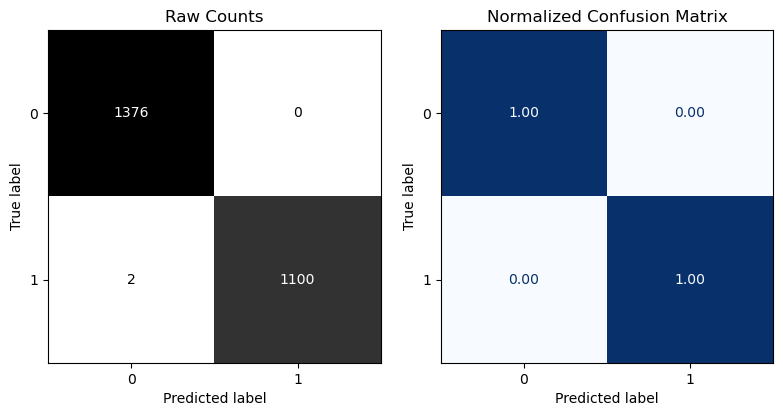

In [26]:
print(results_dict['train']['classification_report'])
fig = results_dict['train']['confusion_matrix']

----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       492
           1       0.92      0.94      0.93       335

    accuracy                           0.94       827
   macro avg       0.94      0.94      0.94       827
weighted avg       0.94      0.94      0.94       827





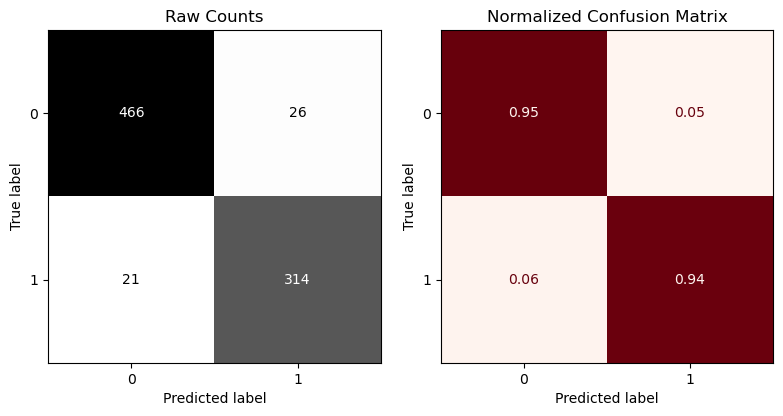

In [27]:
print(results_dict['test']['classification_report'])
fig = results_dict['test']['confusion_matrix']
fig

## Recommendations:

Based on the analysis of the 1-star and 5-star reviews, here are 5 actionable business recommendations to improve the product:

1. **Improve Texture**: Address the issue of rubbery texture mentioned in the 1-star reviews. Consider reformulating the product to make it less chewy and more similar to traditional noodles. Conduct taste tests and gather feedback from customers to ensure the texture is satisfactory.
2. **Enhance Absorption**: Work on improving the noodles' ability to absorb cooking sauces. This will address the complaint mentioned in the 1-star reviews and make the product more versatile for different recipes. Conduct experiments to find the optimal formulation that allows the noodles to absorb flavors effectively.
3. **Address Smell**: Although the smell issue was mentioned in both positive and negative reviews, it is important to minimize any unpleasant odor when the package is first opened. Explore ways to reduce or eliminate the initial smell, such as using different packaging materials or adding natural odor-neutralizing ingredients.
4. **Simplify Preparation**: Make the cooking process easier for customers. Provide clear instructions on the packaging and consider offering pre-cooked or partially cooked options for those who find it difficult to prepare the noodles. This will address the complaints about the difficulty of cooking mentioned in the 1-star reviews.
5. **Highlight Health Benefits**: Emphasize the low-calorie and healthy aspects of the product in marketing materials and product descriptions. This will reinforce the positive feedback from the 5-star reviews and attract customers who are conscious about their calorie intake and overall health.

By implementing these recommendations, you can address the concerns raised in the 1-star reviews and further enhance the positive aspects highlighted in the 5-star reviews. Regularly gather customer feedback to continuously improve the product and meet the needs of your target audience.

## Limitations & Next Steps

More of your own text here


<!-- ### For further information
Please review the narrative of our analysis in [our jupyter notebook](./index.ipynb) or review our [presentation](./SampleProjectSlides.pdf)

For any additional questions, please contact **email, email, email) -->

<!-- 
##### Repository Structure:

Here is where you would describe the structure of your repoistory and its contents, for exampe:

```

├── README.md               <- The top-level README for reviewers of this project.
├── index.ipynb             <- narrative documentation of analysis in jupyter notebook
├── presentation.pdf        <- pdf version of project presentation
└── images
    └── images               <- both sourced externally and generated from code
└── data
    └── 

``` -->